<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Расчет-эффективности-обагощения" data-toc-modified-id="Расчет-эффективности-обагощения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчет эффективности обагощения</a></span></li><li><span><a href="#Проверка-недостающих-колонок" data-toc-modified-id="Проверка-недостающих-колонок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка недостающих колонок</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-концентрации-металлов" data-toc-modified-id="Анализ-изменения-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменения концентрации металлов</a></span></li><li><span><a href="#Сравние-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравние-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравние распределения размеров гранул исходного сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследование-суммарной-концентрацию-металлов-на-разных-стадиях." data-toc-modified-id="Исследование-суммарной-концентрацию-металлов-на-разных-стадиях.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрацию металлов на разных стадиях.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функции-расчета-метрик-sMAPE-и-Final-sMAPE" data-toc-modified-id="Функции-расчета-метрик-sMAPE-и-Final-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функции расчета метрик sMAPE и Final sMAPE</a></span></li><li><span><a href="#Обучение-моделей-регрессии" data-toc-modified-id="Обучение-моделей-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей регрессии</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Описание данных

Технологический процесс

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

## Подготовка данных

### Знакомство с данными

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor


In [2]:
try:
    gold_train = pd.read_csv('/datasets/gold_industry_train.csv', index_col = 'date')
    gold_test = pd.read_csv('/datasets/gold_industry_test.csv', index_col = 'date')
    gold_full = pd.read_csv('/datasets/gold_industry_full.csv', index_col = 'date')
except:
    gold_train = pd.read_csv('gold_industry_train.csv', index_col = 'date')
    gold_test = pd.read_csv('gold_industry_test.csv', index_col = 'date')
    gold_full = pd.read_csv('gold_industry_full.csv', index_col = 'date')

In [3]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 2016-01-15 00:00:00 to 2017-12-09 13:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               14579 non-null  float64
 1   rougher.input.feed_ag                               14579 non-null  float64
 2   rougher.input.feed_pb                               14507 non-null  float64
 3   rougher.input.feed_sol                              14502 non-null  float64
 4   rougher.input.feed_rate                             14572 non-null  float64
 5   rougher.input.feed_size                             14478 non-null  float64
 6   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 7   rougher.input.floatbank10_xanthate                  14572 non-null  float64
 8   rougher.state.floatbank10_a_air                  

In [4]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4832 non-null   float64
 3   rougher.input.feed_sol                      4838 non-null   float64
 4   rougher.input.feed_rate                     4856 non-null   float64
 5   rougher.input.feed_size                     4816 non-null   float64
 6   rougher.input.floatbank10_sulfate           4857 non-null   float64
 7   rougher.input.floatbank10_xanthate          4859 non-null   float64
 8   rougher.state.floatbank10_a_air             4859 non-null   float64
 9   rougher.state.floatbank10_a_level           4859 non-null

In [5]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               19439 non-null  float64
 1   rougher.input.feed_ag                               19439 non-null  float64
 2   rougher.input.feed_pb                               19339 non-null  float64
 3   rougher.input.feed_sol                              19340 non-null  float64
 4   rougher.input.feed_rate                             19428 non-null  float64
 5   rougher.input.feed_size                             19294 non-null  float64
 6   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 7   rougher.input.floatbank10_xanthate                  19431 non-null  float64
 8   rougher.state.floatbank10_a_air                  

In [6]:
gold_train.head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


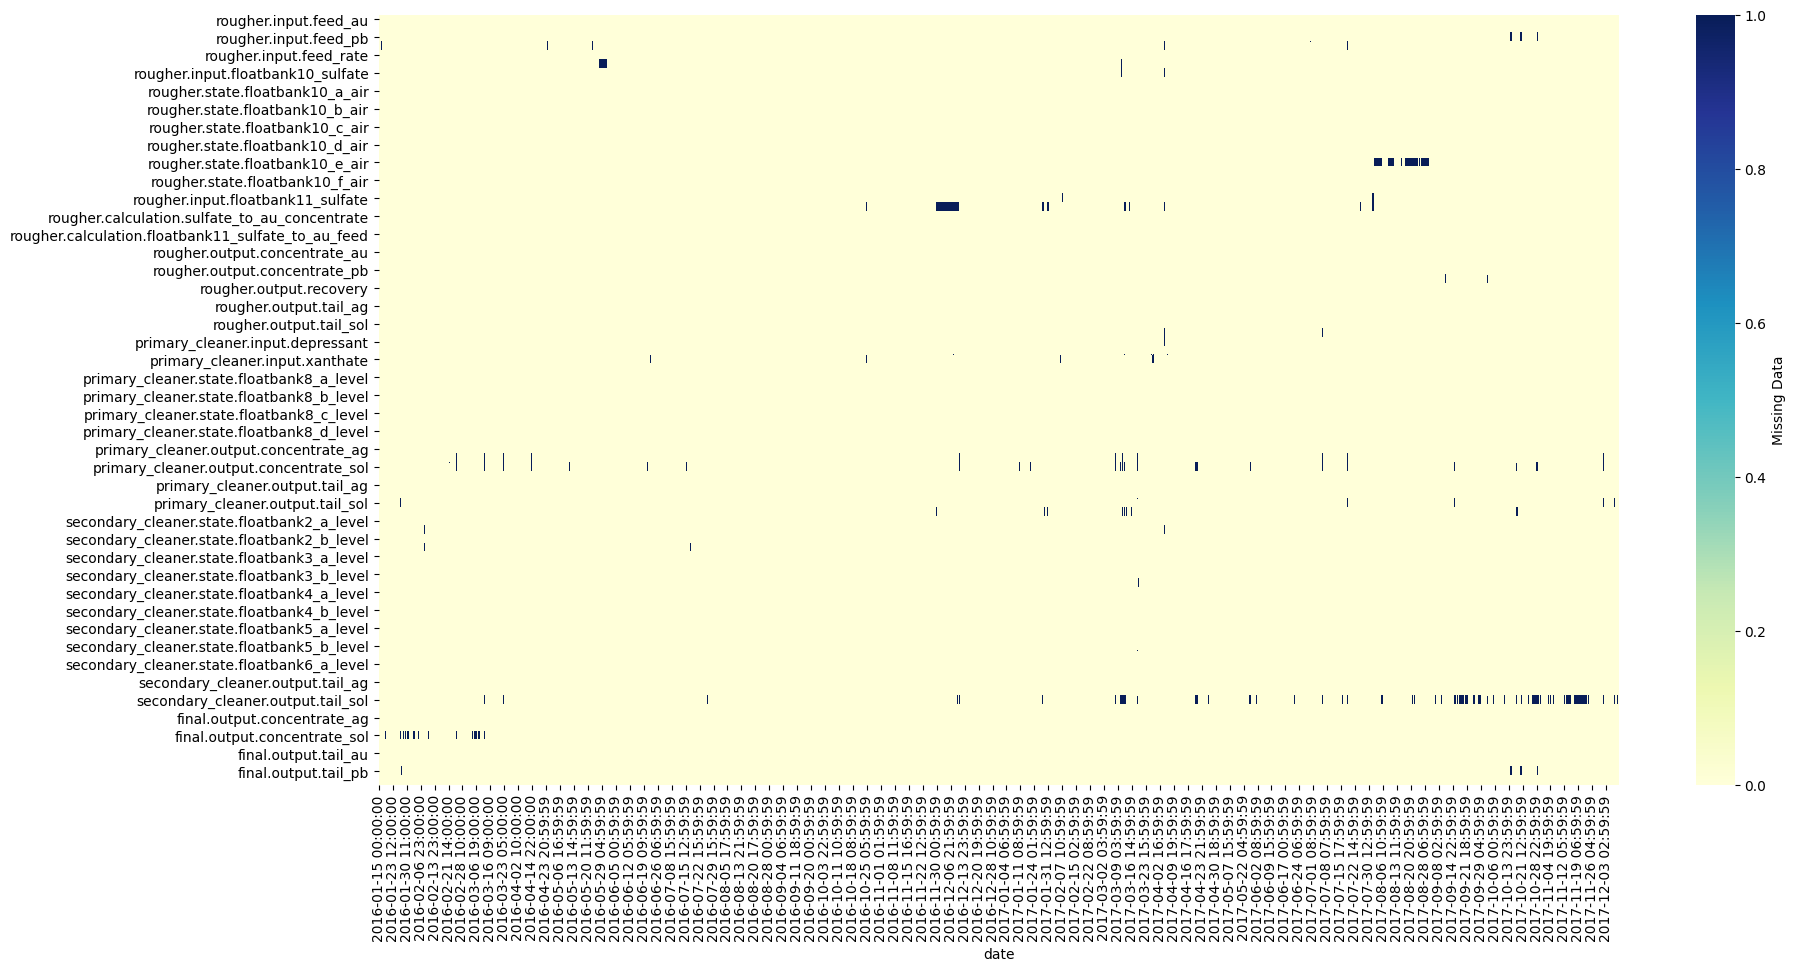

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(gold_train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'});

In [8]:
gold_train.isna().sum().to_frame().rename(
    columns = {0:'nans_train'}).query('nans_train > 0').sort_values(by='nans_train', ascending=False)

,nans_train
secondary_cleaner.output.tail_sol,920
rougher.state.floatbank10_e_air,429
rougher.input.floatbank11_xanthate,407
primary_cleaner.output.concentrate_sol,265
final.output.concentrate_sol,192
rougher.input.feed_size,101
secondary_cleaner.state.floatbank2_a_air,94
primary_cleaner.output.concentrate_pb,88
rougher.input.feed_sol,77
final.output.tail_pb,75


In [9]:
gold_test.isna().sum().to_frame().rename(
    columns = {0:'nans'}).query('nans > 0').sort_values(by='nans',
                                ascending=False)

,nans
secondary_cleaner.state.floatbank2_a_air,126
rougher.input.floatbank11_xanthate,46
rougher.input.feed_size,44
primary_cleaner.input.xanthate,43
rougher.input.feed_pb,28
rougher.input.feed_sol,22
primary_cleaner.input.depressant,9
rougher.input.floatbank11_sulfate,8
rougher.state.floatbank10_e_air,7
rougher.input.feed_rate,4


In [10]:
gold_full.isna().sum().to_frame().rename(
    columns = {0:'nans'}).query('nans > 0').sort_values(by='nans', ascending=False)

,nans
secondary_cleaner.output.tail_sol,1748
rougher.input.floatbank11_xanthate,453
rougher.state.floatbank10_e_air,436
primary_cleaner.output.concentrate_sol,370
secondary_cleaner.state.floatbank2_a_air,220
...,...
primary_cleaner.state.floatbank8_a_level,1
rougher.state.floatbank10_b_air,1
rougher.output.tail_ag,1
rougher.state.floatbank10_b_level,1


In [11]:
print('Количество пропусков в тренировочной выборке:', gold_train.isna().sum().sum())
print('Доля пропусков в тренировочной выборке:',
      (gold_train.isna().sum().sum()/len(gold_train)))

Количество пропусков в тренировочной выборке: 3050
Доля пропусков в тренировочной выборке: 0.20920502092050208


In [12]:
print('Количество пропусков в тестовой выборке:', gold_test.isna().sum().sum())
print('Доля пропусков в тестовой выборке:', 
      (gold_test.isna().sum().sum()/len(gold_test)))

Количество пропусков в тестовой выборке: 375
Доля пропусков в тестовой выборке: 0.07716049382716049


In [13]:
print('Количество пропусков в полном датафрейме:', gold_full.isna().sum().sum())
print('Доля пропусков в полном датафрейме:', 
      (gold_full.isna().sum().sum()/len(gold_full)))

Количество пропусков в полном датафрейме: 4481
Доля пропусков в полном датафрейме: 0.23051597304388086


Вывод: В данных есть значительное количество пропусков: 3050 (21%) в тернировочной, 375 (7%) в тестовой и 4481 (23%) в полном наборе данных. 

### Расчет эффективности обагощения

Эффективность обогащения рассчитывается по формуле:

recovery = (C*(F-T)/F*(C-T))*100

где:

C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

In [14]:
с = gold_train["rougher.output.concentrate_au"]
f = gold_train["rougher.input.feed_au"]
t = gold_train["rougher.output.tail_au"]

recovery_calc = ((с*(f-t))/(f*(с-t)))*100 

In [15]:
#recovery_calc.describe()
#gold_train['rougher.output.recovery'].describe()

In [16]:
mae = mean_absolute_error(
    gold_train['rougher.output.recovery'], recovery_calc)
print(mae)

9.83758577644259e-15


Вывод: средняя абсолютная ошибка между расчитанными значениями эффективности обагощения recovery и результатами в тренировочной выборке очень мала. Это говорит о надежности данных в тренировочной выборке.

### Проверка недостающих колонок
На первом этапе выявлено, что количество колонок в тренировочной выборке и тестовой разное: 87 и 53. Проверим каких колонок не хватает в тестовой выборке.

In [17]:
missing = set(gold_train.columns) - set(gold_test.columns)
missing

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [18]:
set(gold_test.columns) - set(gold_train.columns)

set()

Вывод: отсутствующие колонки в основном содержат выходные параметры продукта (output), например концентрация металлов. Колонок, которых нет в train но есть в test нет. Недостающие параметры - это выходные параметры процесса обработки руды на разных стадиях, можно отнести их к онлайн метрикам - вычисляемым в реально работающей системе. В тестовой выборке только параметры известные до процесса т.к. задача модели предсказать результаты процесса. Также в тренировочной выборке отсутствуют целевые параметры для модели, колонки rougher.output.recovery и final.output.recovery. Их можно взять из набора данных full, а в тернировочной выборке удалить лишние стобцы.

### Предобработка данных
В описании данных указано что значения близкие по времени (индексу) очень похожи, в таком случае для заполнения пропусков удобно использовать метод ffill. Поскольку пропусков критически много, проверим как изменится распределение значений до и после заполнения в колонках где их больше ста. Не будем учитывать колонки со значениями output, тк далее их отбросим.

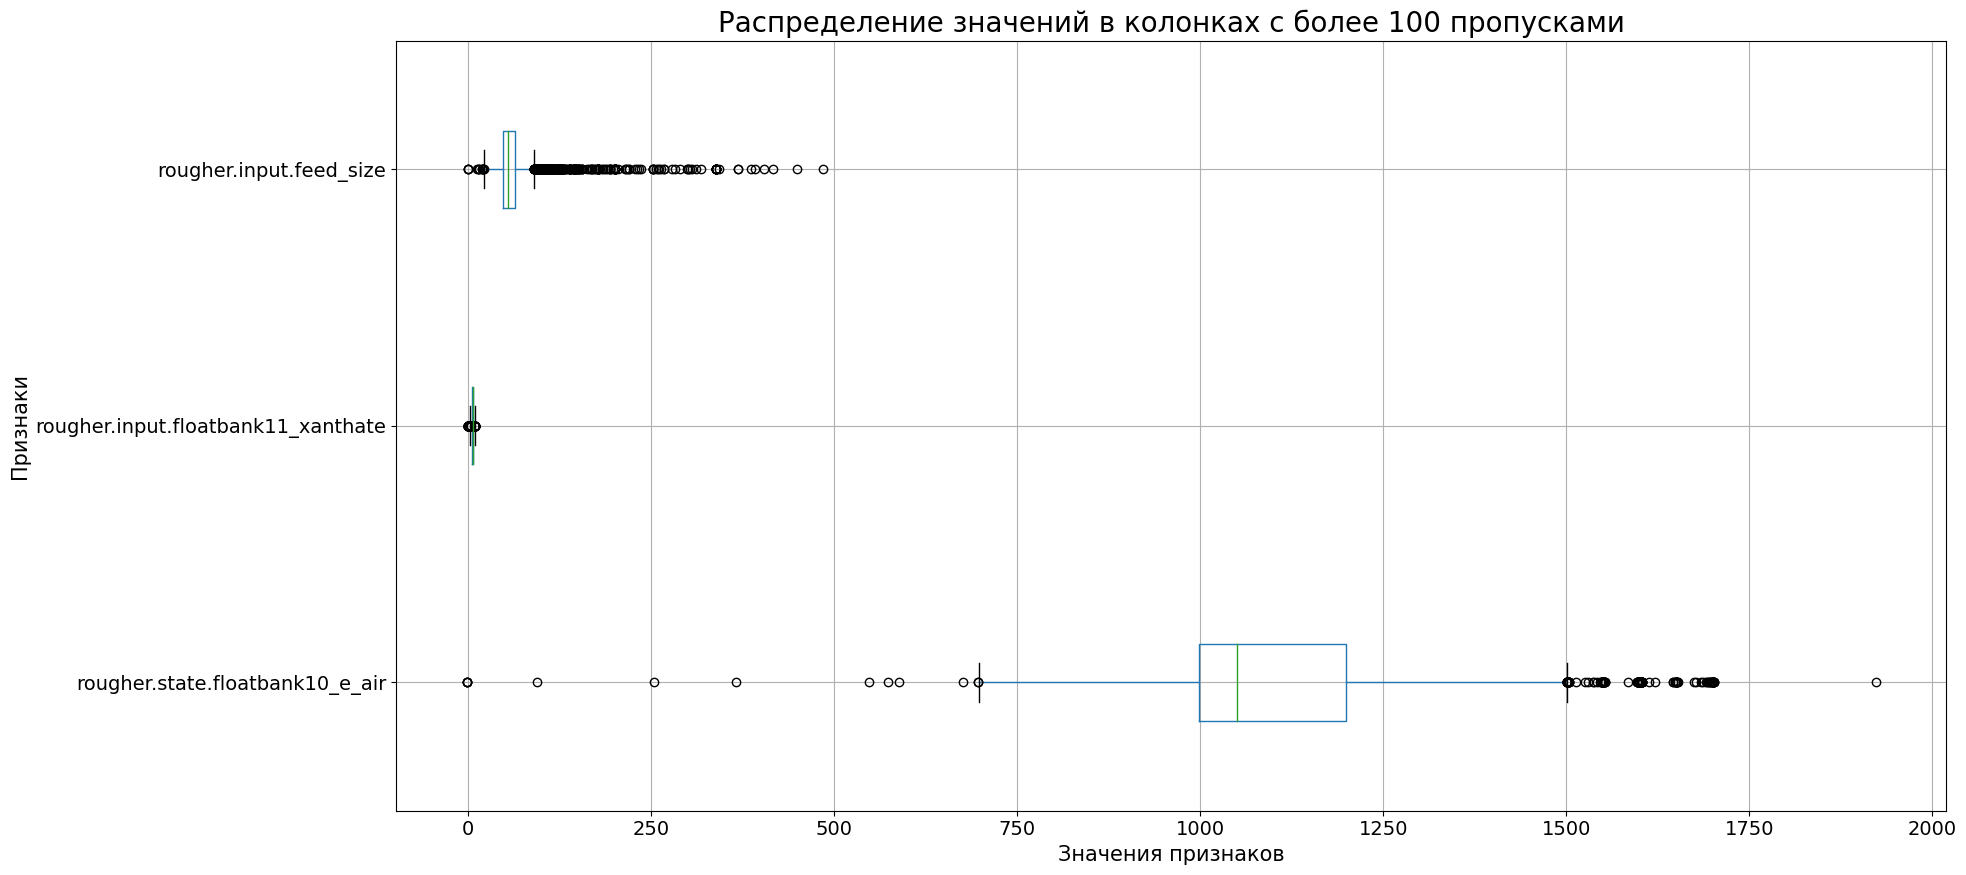

In [19]:
gold_train[['rougher.state.floatbank10_e_air',
            'rougher.input.floatbank11_xanthate',
            'rougher.input.feed_size']].boxplot(figsize = (20,10), vert=False, fontsize=14);
plt.title('Распределение значений в колонках с более 100 пропусками', size=20)
plt.xlabel('Значения признаков', size=15);
plt.ylabel('Признаки', size=15);

In [20]:
gold_train = gold_train.ffill()

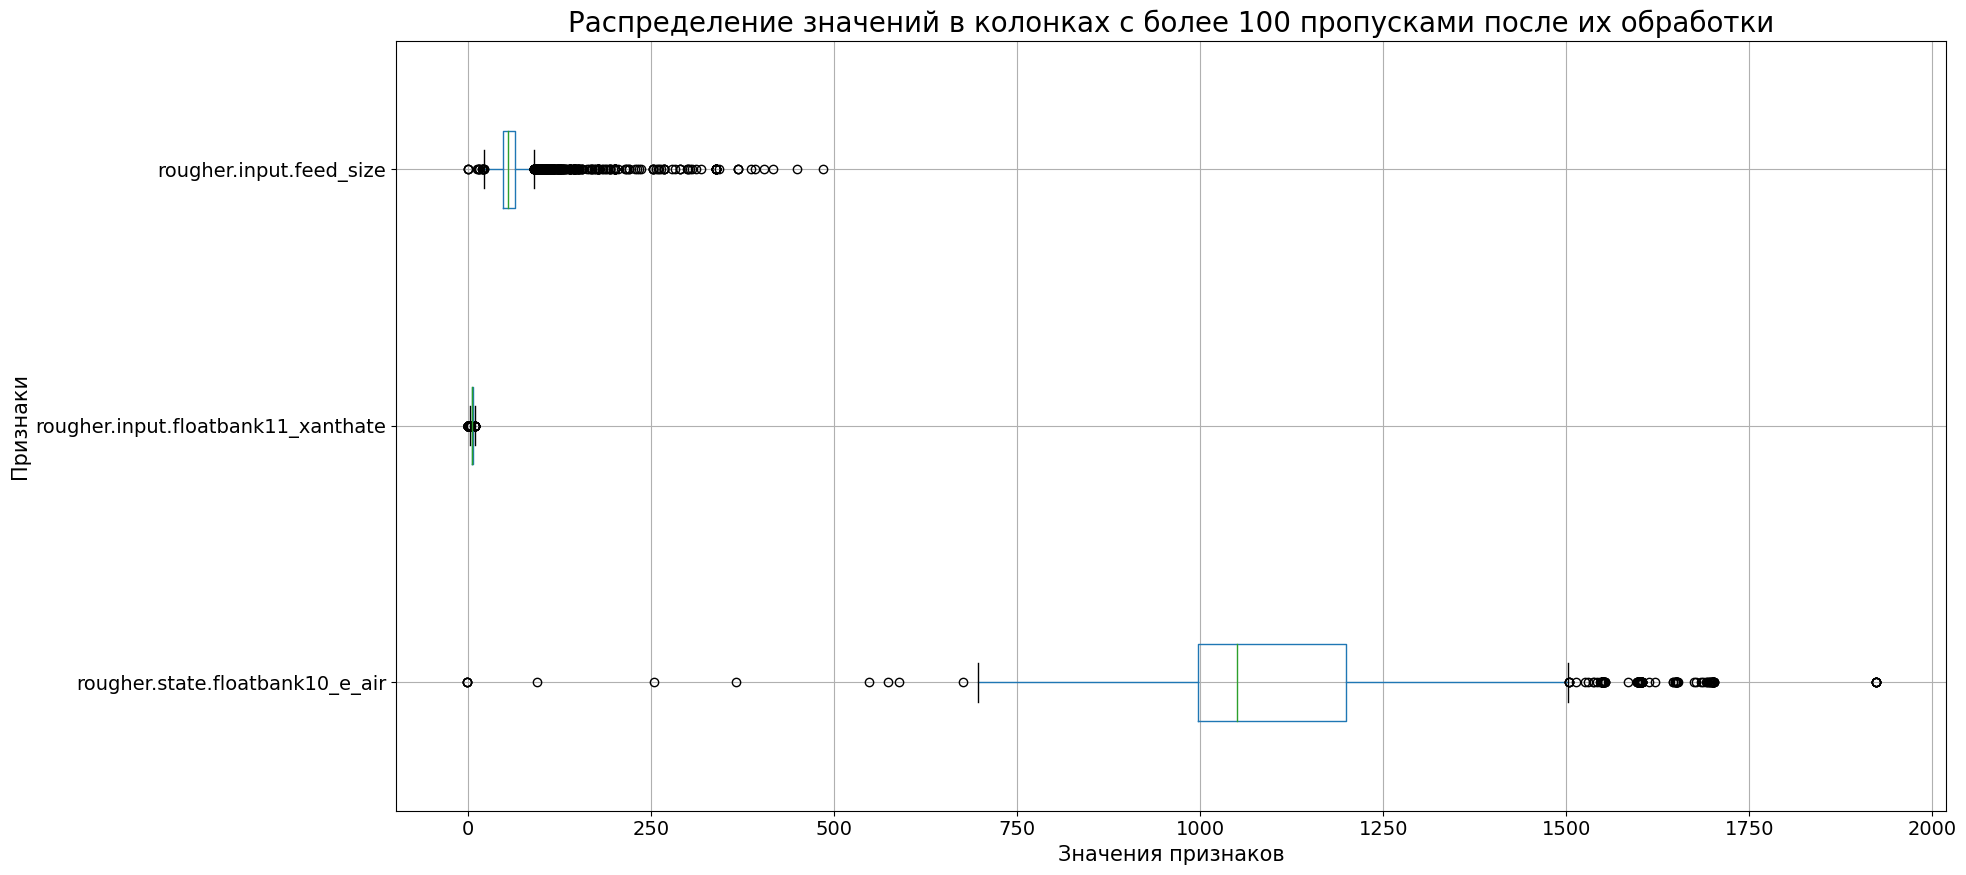

In [21]:
gold_train[['rougher.state.floatbank10_e_air',
            'rougher.input.floatbank11_xanthate',
            'rougher.input.feed_size']].boxplot(figsize = (20,10), vert=False, fontsize=14);
plt.title('Распределение значений в колонках с более 100 пропусками после их обработки', size=20)
plt.xlabel('Значения признаков', size=15);
plt.ylabel('Признаки', size=15);

Распределение значений совсем не изменилось, действительно, метод ffill хорошо подходит для обработку пропусков в представленных данных. Проверим также остальные датафреймы. В тестовой выборке пропусков меньше, проверим колонки с более чем 20 пропусками.

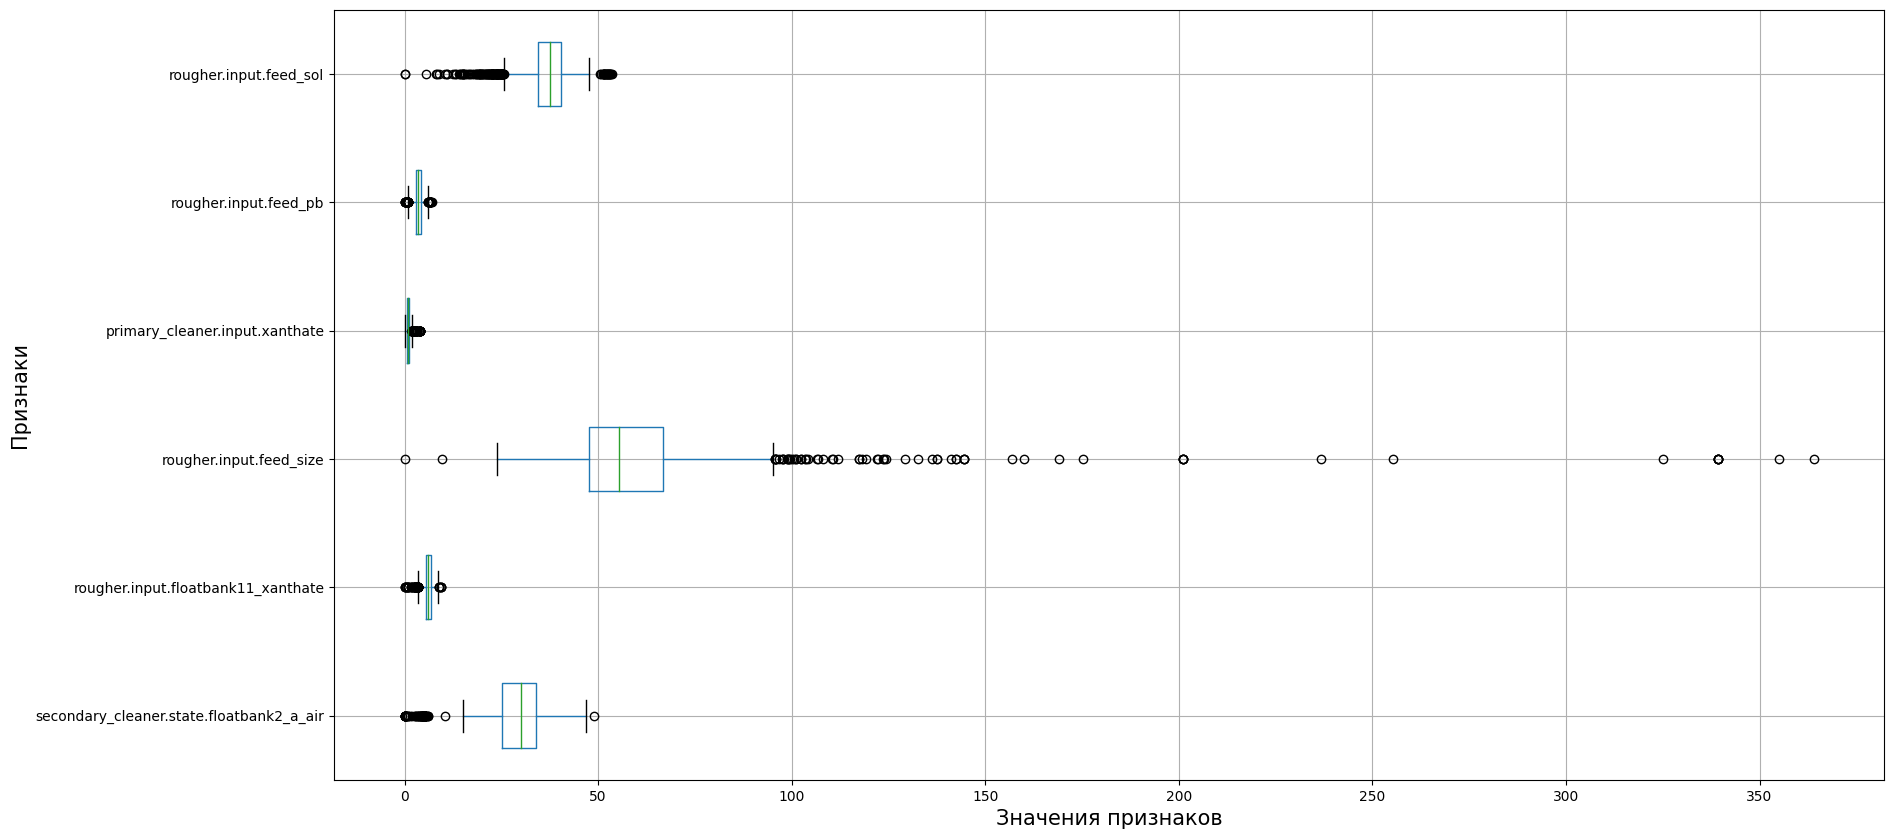

In [22]:
gold_test[['secondary_cleaner.state.floatbank2_a_air',
            'rougher.input.floatbank11_xanthate',
            'rougher.input.feed_size', 
            'primary_cleaner.input.xanthate',
            'rougher.input.feed_pb',
            'rougher.input.feed_sol']].boxplot(figsize = (20,10), vert=False);
plt.xlabel('Значения признаков', size=15);
plt.ylabel('Признаки', size=15);

In [23]:
gold_test = gold_test.ffill()

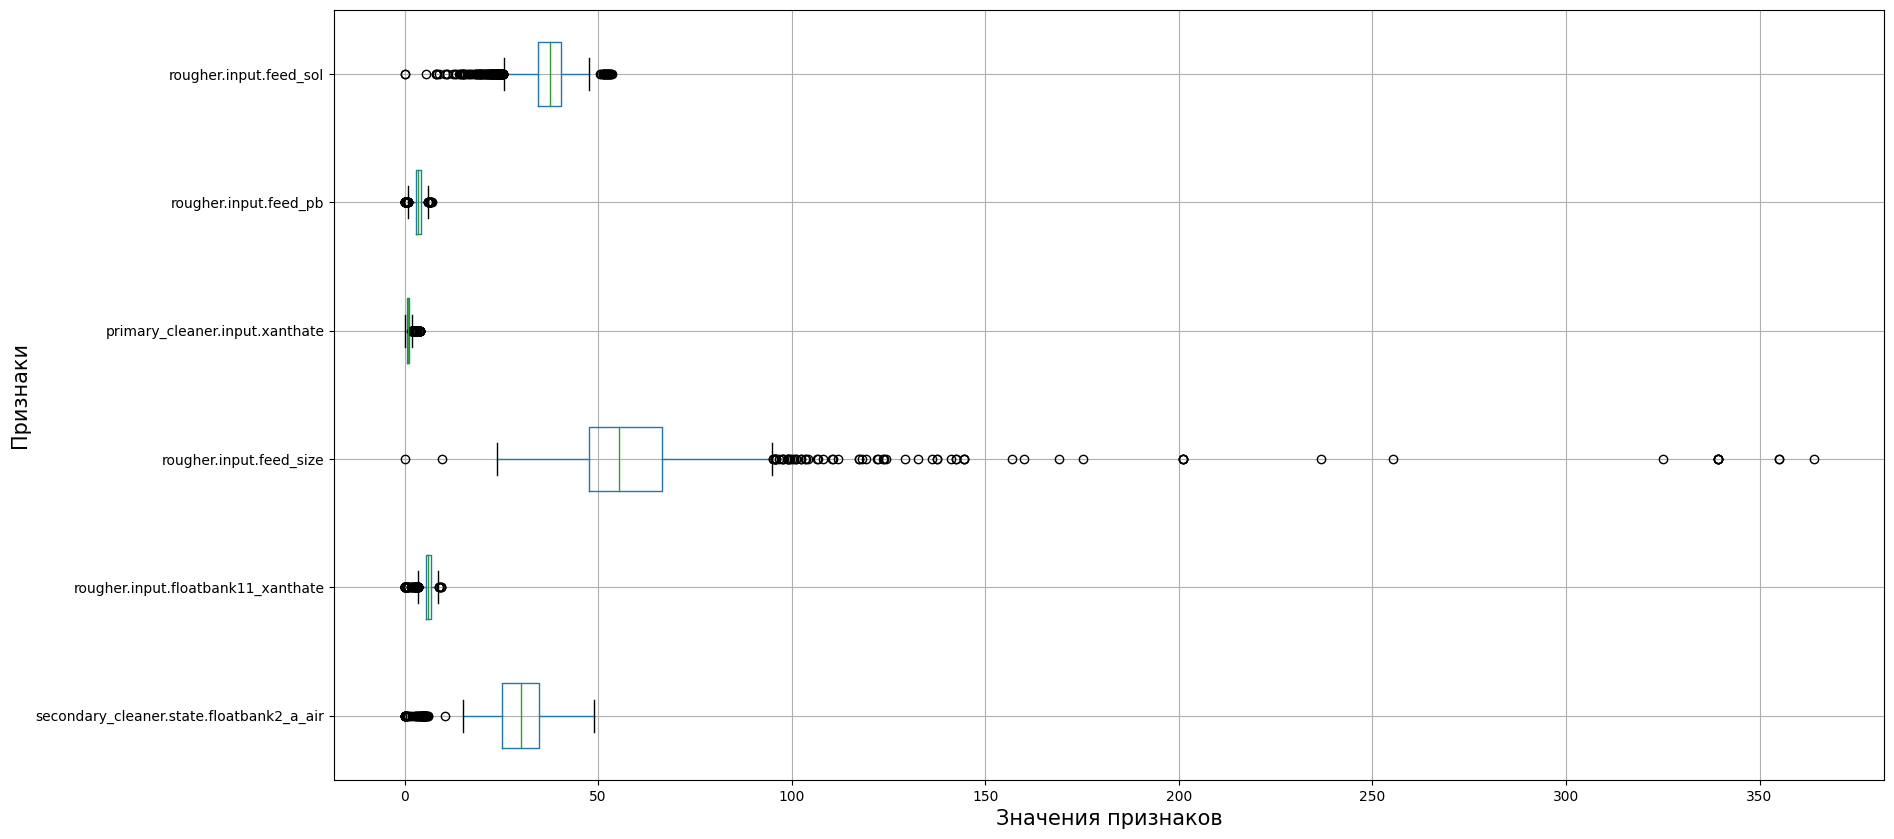

In [24]:
gold_test[['secondary_cleaner.state.floatbank2_a_air',
            'rougher.input.floatbank11_xanthate',
            'rougher.input.feed_size', 
            'primary_cleaner.input.xanthate',
            'rougher.input.feed_pb',
            'rougher.input.feed_sol']].boxplot(figsize = (20,10), vert=False)
plt.xlabel('Значения признаков', size=15)
plt.ylabel('Признаки', size=15);

Видно, что немного изменилось распределение только в колонке rougher.input.feed_sol

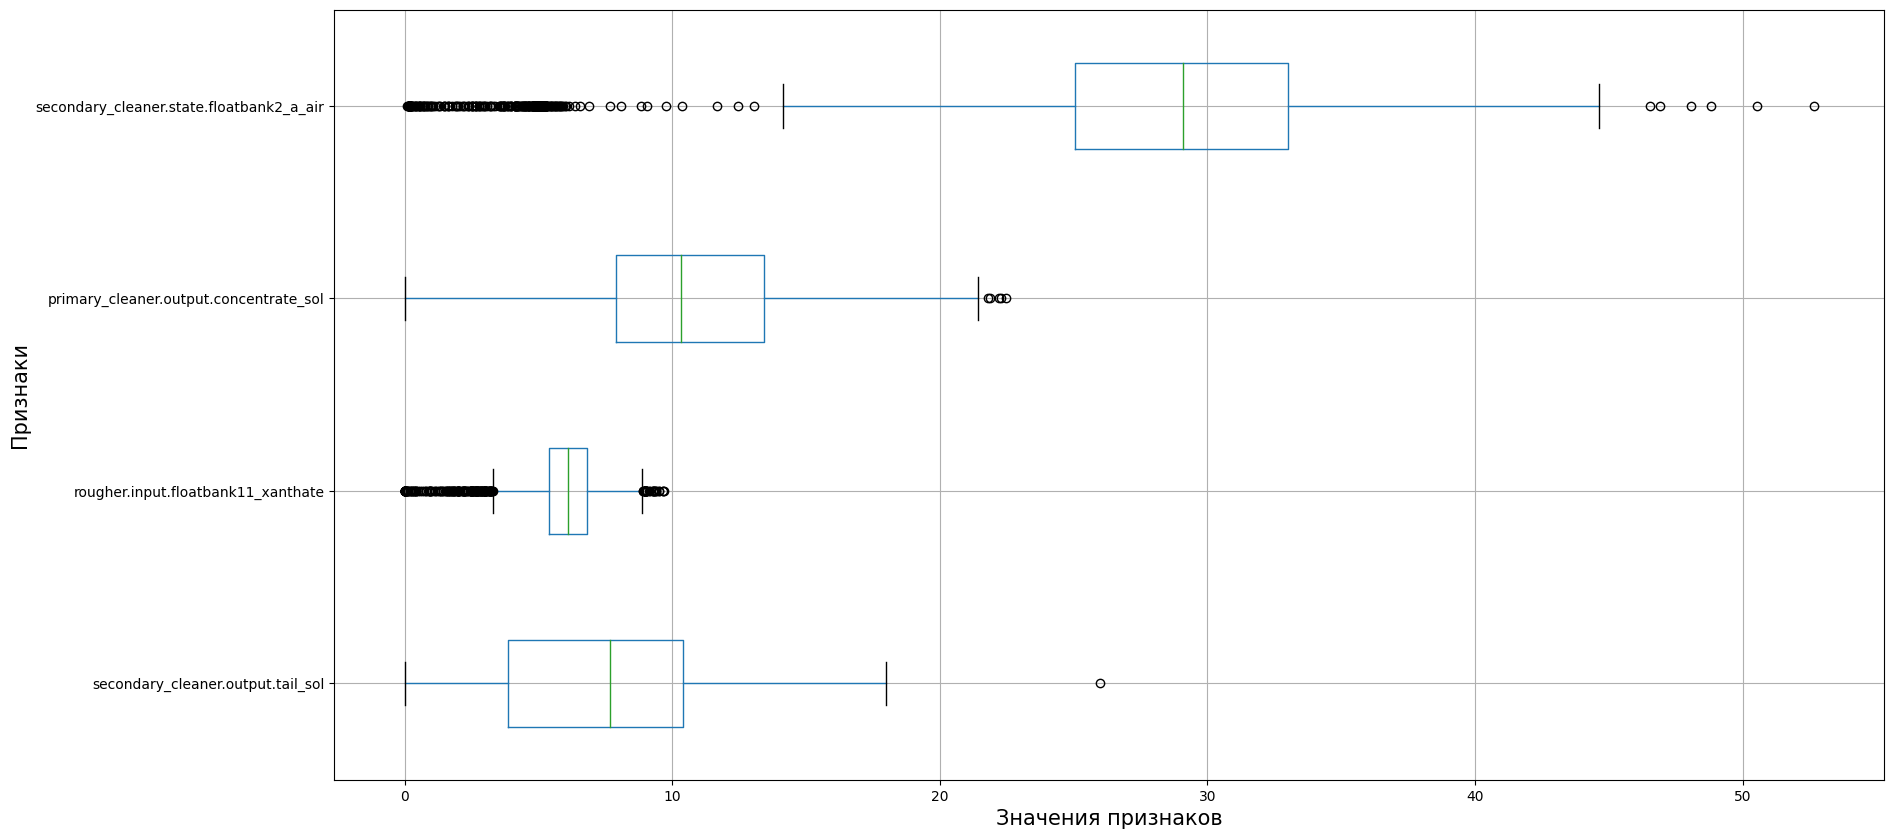

In [25]:
gold_full[['secondary_cleaner.output.tail_sol',
           'rougher.input.floatbank11_xanthate',
           'primary_cleaner.output.concentrate_sol',
           'secondary_cleaner.state.floatbank2_a_air',]].boxplot(figsize = (20,10), vert=False);
plt.xlabel('Значения признаков', size=15);
plt.ylabel('Признаки', size=15);

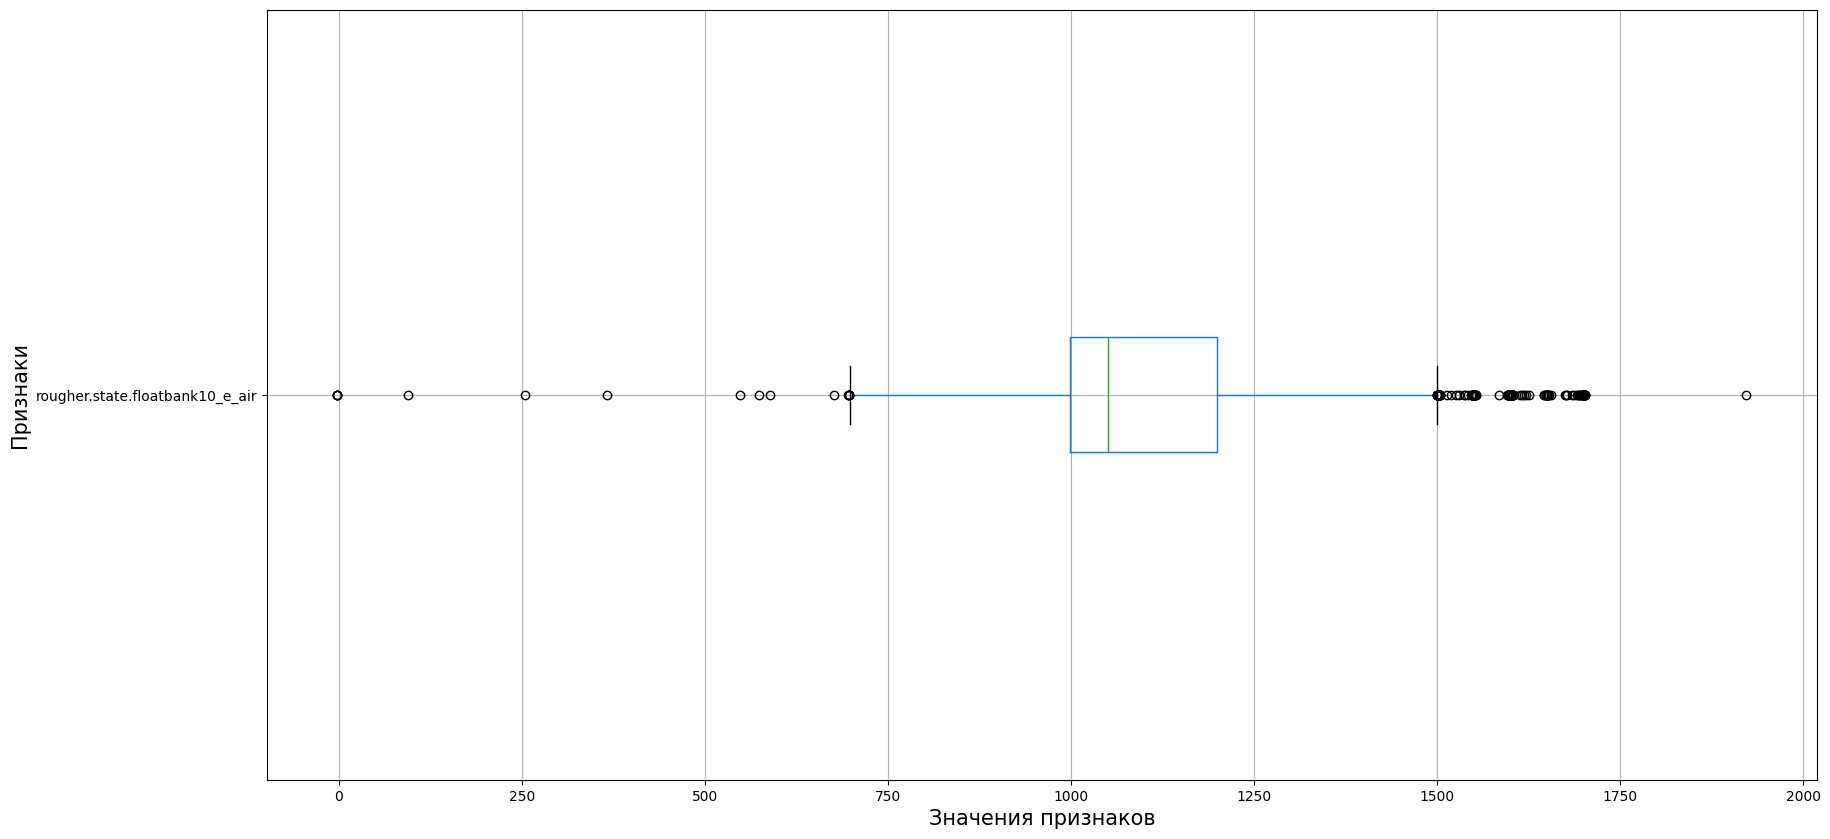

In [26]:
gold_full[['rougher.state.floatbank10_e_air']].boxplot(figsize = (20,10), vert=False);
plt.xlabel('Значения признаков', size=15);
plt.ylabel('Признаки', size=15);

In [27]:
gold_full = gold_full.ffill()

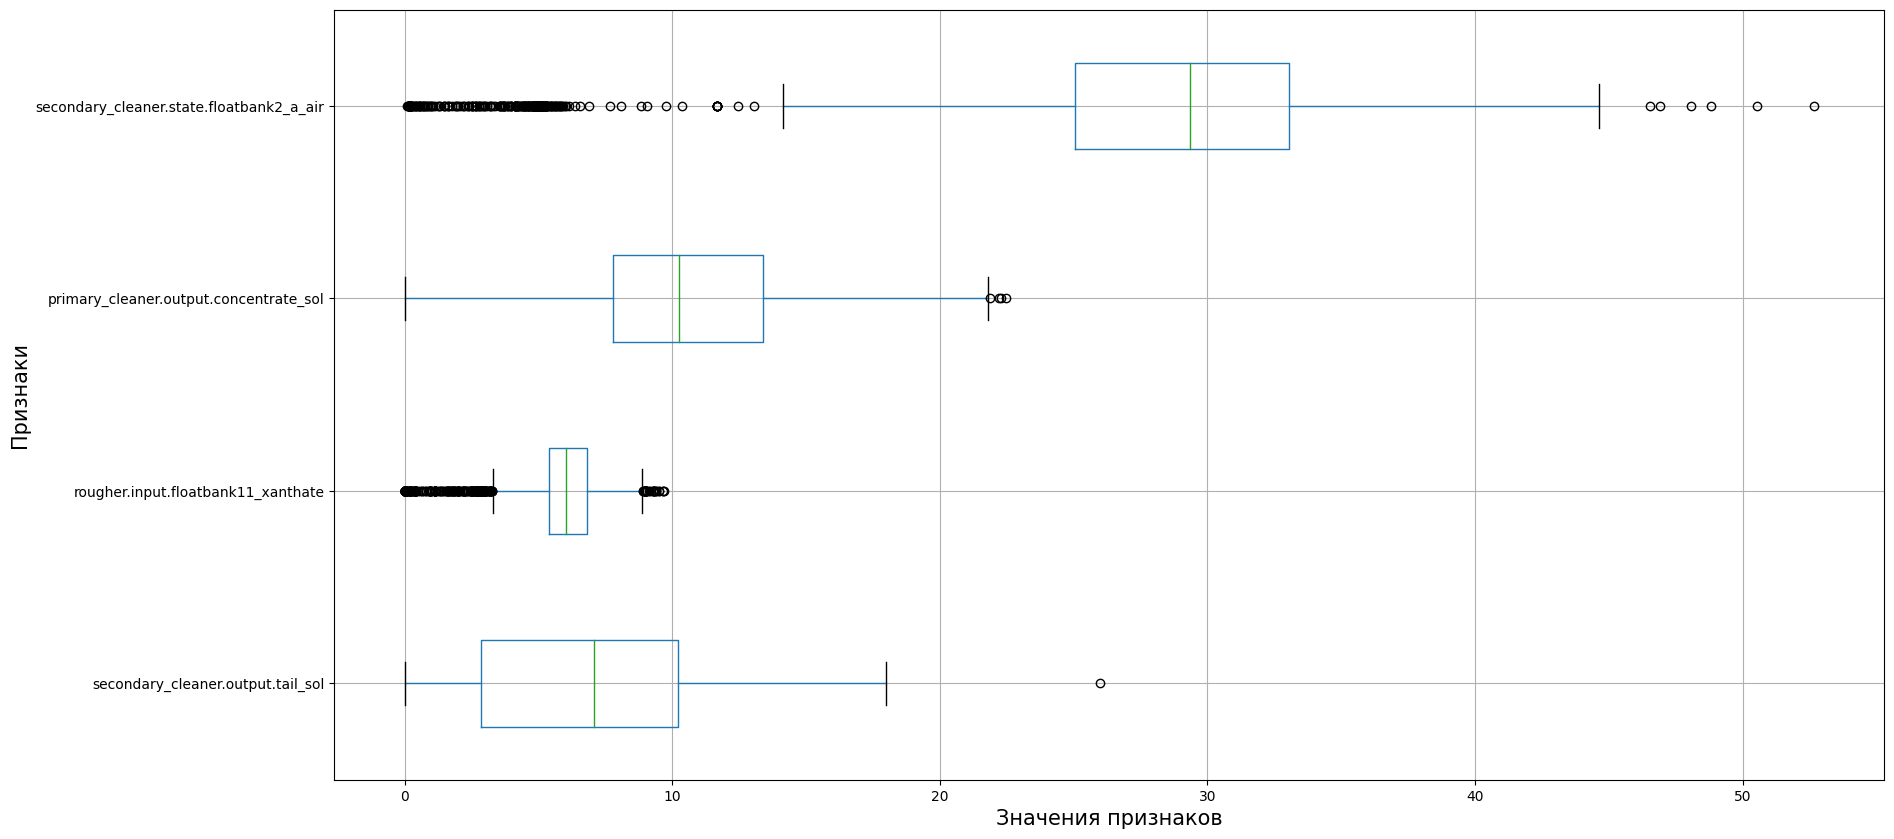

In [28]:
gold_full[['secondary_cleaner.output.tail_sol',
           'rougher.input.floatbank11_xanthate',
           'primary_cleaner.output.concentrate_sol',
           'secondary_cleaner.state.floatbank2_a_air',]].boxplot(figsize = (20,10), vert=False);
plt.xlabel('Значения признаков', size=15);
plt.ylabel('Признаки', size=15);

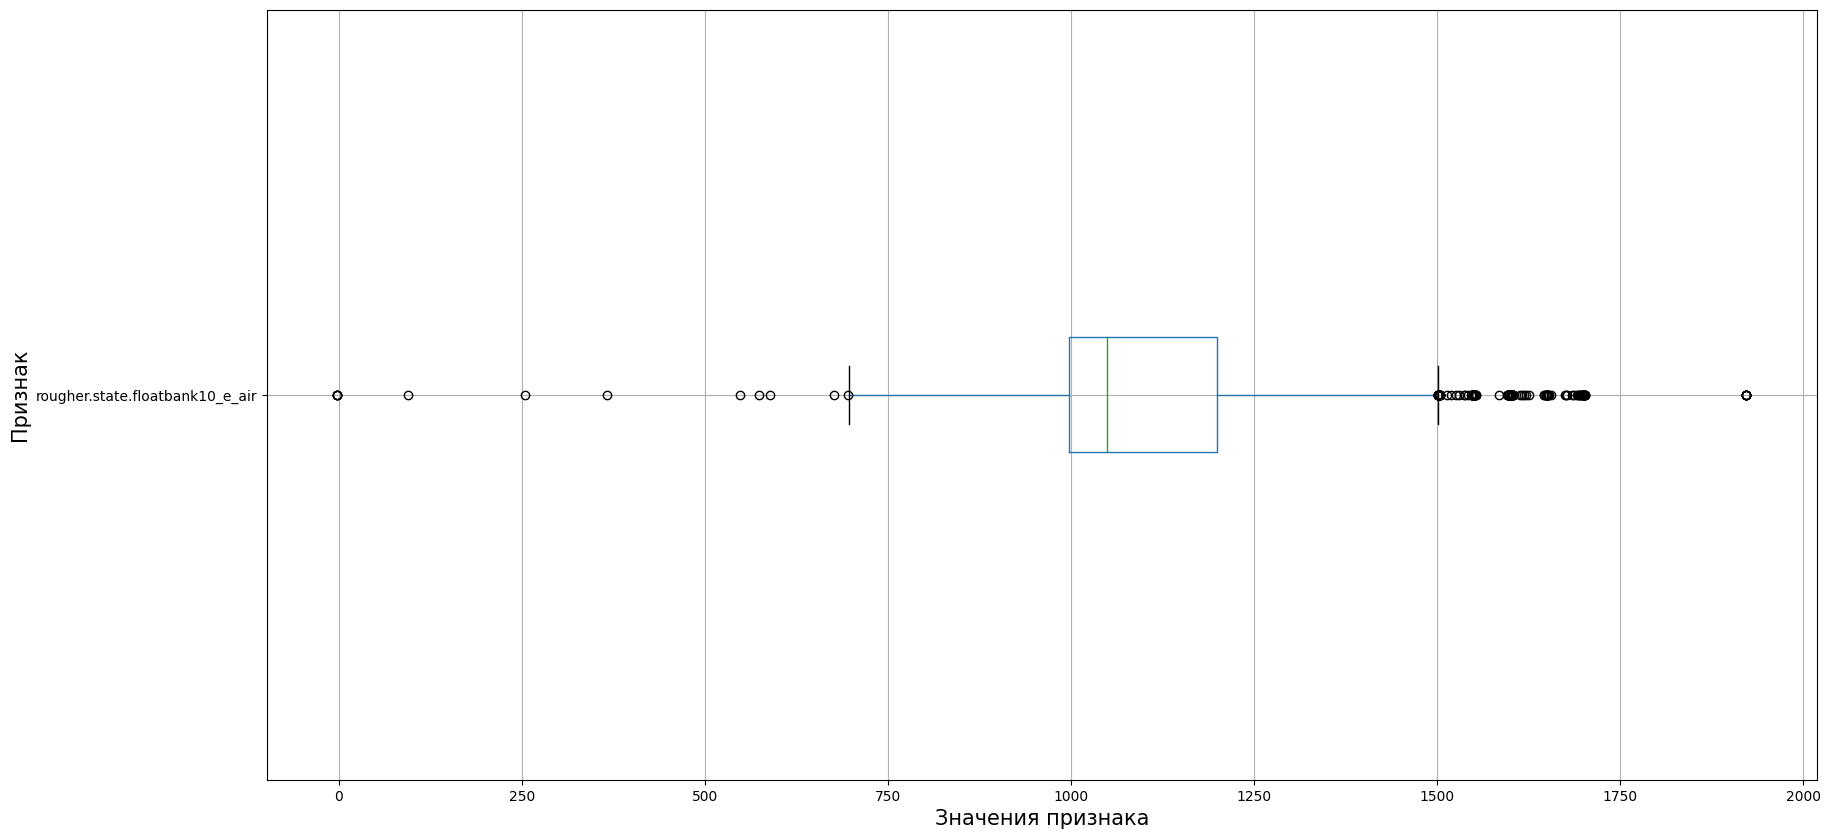

In [29]:
gold_full[['rougher.state.floatbank10_e_air']].boxplot(figsize = (20,10), vert=False);
plt.xlabel('Значения признака', size=15);
plt.ylabel('Признак', size=15);

Итог: распределения не изменились, можно считать что заполнение пропусков сработало корректно. 

Удалим из тренировочной выборки онлайн метрики и далее из полного набора возьмем недостающие колонки c целевыми признаками и объединим с тестовой выборкой. Выберем строки, соответствующие индексу в gold_test.

In [30]:
#Удалим из списка missing имена колонк с целевыми признаками
missing = missing - {'final.output.recovery', 'rougher.output.recovery'}
missing

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

In [31]:
gold_train = gold_train.drop(missing, axis=1)
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 2016-01-15 00:00:00 to 2017-12-09 13:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       14579 non-null  float64
 1   rougher.input.feed_ag                       14579 non-null  float64
 2   rougher.input.feed_pb                       14579 non-null  float64
 3   rougher.input.feed_sol                      14579 non-null  float64
 4   rougher.input.feed_rate                     14579 non-null  float64
 5   rougher.input.feed_size                     14579 non-null  float64
 6   rougher.input.floatbank10_sulfate           14579 non-null  float64
 7   rougher.input.floatbank10_xanthate          14579 non-null  float64
 8   rougher.state.floatbank10_a_air             14579 non-null  float64
 9   rougher.state.floatbank10_a_level           14579 non-nu

In [32]:
target_columns = gold_full[['rougher.output.recovery', 'final.output.recovery']].loc[gold_test.index]
target_columns.info()
display(target_columns.head())

<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  4860 non-null   float64
 1   final.output.recovery    4860 non-null   float64
dtypes: float64(2)
memory usage: 113.9+ KB


,rougher.output.recovery,final.output.recovery
date,,
2017-12-09 14:59:59,89.514960,70.281454
2017-12-09 15:59:59,89.858126,65.523246
2017-12-09 16:59:59,91.816623,74.817644
2017-12-09 17:59:59,88.478959,63.082720
2017-12-09 18:59:59,89.230316,74.463380


In [33]:
gold_test_merged = gold_test.merge(target_columns, on='date', how='left')
gold_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4860 non-null   float64
 3   rougher.input.feed_sol                      4860 non-null   float64
 4   rougher.input.feed_rate                     4860 non-null   float64
 5   rougher.input.feed_size                     4860 non-null   float64
 6   rougher.input.floatbank10_sulfate           4860 non-null   float64
 7   rougher.input.floatbank10_xanthate          4860 non-null   float64
 8   rougher.state.floatbank10_a_air             4860 non-null   float64
 9   rougher.state.floatbank10_a_level           4860 non-null

Проверим, что столбцы идентичны:

In [34]:
set(gold_test_merged.columns) - set(gold_train.columns)

set()

Вывод: Колонки в  gold_test_merged соответствуют gold_train. Пропусков нет. 

Проверим целевые переменные в gold_train и gold_test

In [35]:
gold_train[['rougher.output.recovery','final.output.recovery']].describe()

,rougher.output.recovery,final.output.recovery
count,14579.000000,14579.000000
mean,82.521200,66.759066
std,15.797521,10.619709
min,0.000000,0.000000
25%,80.558542,63.114596
50%,85.946497,67.962788
75%,89.960375,72.598187
max,100.000000,100.000000


In [36]:
gold_test_merged[['rougher.output.recovery','final.output.recovery']].describe()

,rougher.output.recovery,final.output.recovery
count,4860.000000,4860.000000
mean,85.750584,67.923574
std,6.648023,8.414134
min,18.491446,5.586496
25%,82.354512,63.939233
50%,86.839027,68.744713
75%,90.145117,73.037434
max,100.000000,100.000000


В тренировочной выборке есть нулевые значения в целевых переменных, их нужно удалить, чтобы исключить некорректный расчет ошибки sMAPE.

In [37]:
gold_train = gold_train.loc[(gold_train['rougher.output.recovery'] > 0 ) & (gold_train['final.output.recovery'] > 0 )]

In [38]:
print(gold_train.loc[gold_train['rougher.output.recovery'] == 0, ['rougher.output.recovery', 'final.output.recovery']])
print(gold_train.loc[gold_train['final.output.recovery'] == 0, ['rougher.output.recovery', 'final.output.recovery']])

Empty DataFrame
Columns: [rougher.output.recovery, final.output.recovery]
Index: []
Empty DataFrame
Columns: [rougher.output.recovery, final.output.recovery]
Index: []


Итог: нулевые значения целевых переменных удалены из выборки.

Выводы: Пропуски в наборах данных были заполнены методом ffill, проверка распределения значений до и после заполнения не выявила сильных изменений, что говорит о корректной замене данных в нашем случае. Колонки с онлайн метриками были удалены из тренировочной выборки, а в тестовую добавлены целевые переменные из данных full.

## Анализ данных

### Анализ изменения концентрации металлов
Изменение концентрации металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.


In [39]:
#отбираем колонки, содержащие концентрацию металлов на всех стадиях очистки
concentrate = gold_full.loc[:, gold_full.columns.str.contains('concentrate|feed')]
print(concentrate.columns)

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'primary_cleaner.input.feed_size',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol'],
      dtype='object')


In [40]:
#удаляем 4 лишних столбца
concentrate = concentrate.drop(['rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.input.feed_rate',
       'rougher.calculation.floatbank11_sulfate_to_au_feed'], axis = 1)
print(concentrate.columns)

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_size', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_sol', 'primary_cleaner.input.feed_size',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol'],
      dtype='object')


In [41]:
au = concentrate[['rougher.input.feed_au', 'rougher.output.concentrate_au',
                 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
au.columns = ['Сырье', 'Черновой концентрат', 'Первичная очистка', 'Финальный концентрат']

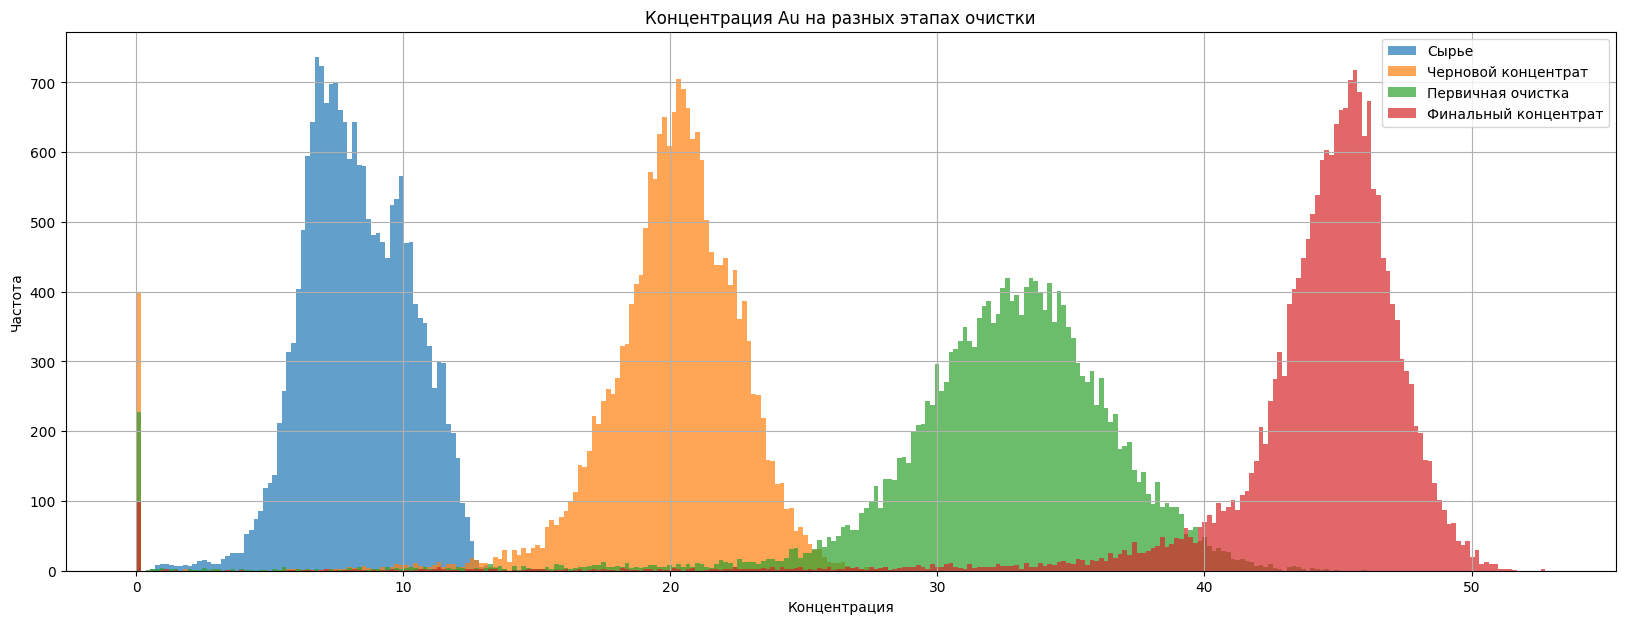

In [42]:
au.plot(kind='hist', bins=300,
        grid=True, legend=True, alpha=0.7,
        figsize=(20, 7)).set_title('Концентрация Au на разных этапах очистки'); 
plt.xlabel('Концентрация')
plt.ylabel('Частота')
plt.show()

In [43]:
ag = concentrate[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
                 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
ag.columns = ['Сырье', 'Черновой концентрат', 'Первичная очистка', 'Финальный концентрат']

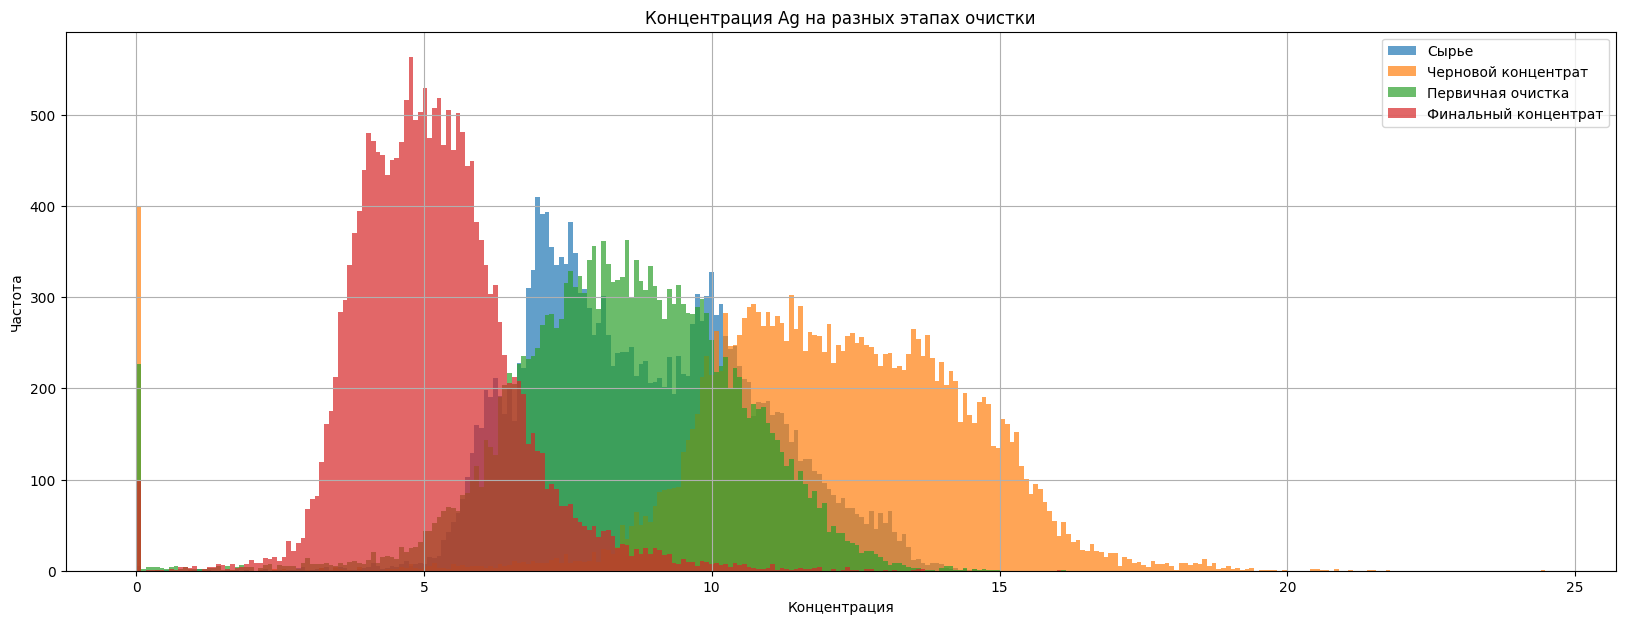

In [44]:
ag.plot(kind='hist', bins=300,
        grid=True, legend=True, alpha=0.7,
        figsize=(20, 7)).set_title('Концентрация Ag на разных этапах очистки'); 
plt.xlabel('Концентрация')
plt.ylabel('Частота')
plt.show()

In [45]:
pb = concentrate[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
                 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
pb.columns = ['Сырье', 'Черновой концентрат', 'Первичная очистка', 'Финальный концентрат']

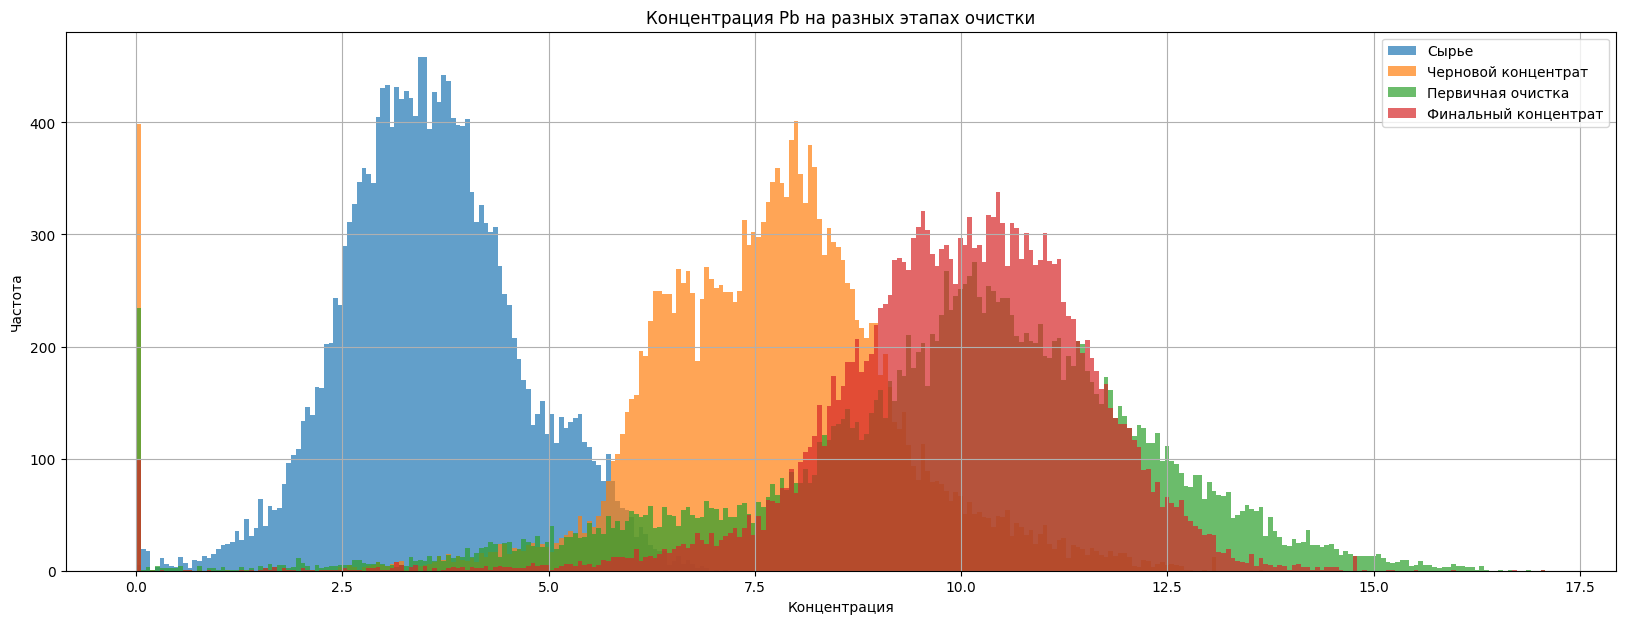

In [46]:
pb.plot(kind='hist', bins=300,
        grid=True, legend=True, alpha=0.7,
        figsize=(20, 7)).set_title('Концентрация Pb на разных этапах очистки');
plt.set_cmap('gist_rainbow')
plt.xlabel('Концентрация')
plt.ylabel('Частота')
plt.show()

Посчитаем средние значения концентраций на всех этапах

In [47]:
mean_au = au.mean().to_frame().reset_index().rename(columns={'index':'этап', 0:'au'})
mean_au

,этап,au
0,Сырье,8.266097
1,Черновой концентрат,19.772000
2,Первичная очистка,32.119400
3,Финальный концентрат,44.076513


In [48]:
mean_ag = ag.mean().to_frame().reset_index().rename(columns={'index':'этап', 0:'ag'})
mean_pb = pb.mean().to_frame().reset_index().rename(columns={'index':'этап', 0:'pb'})

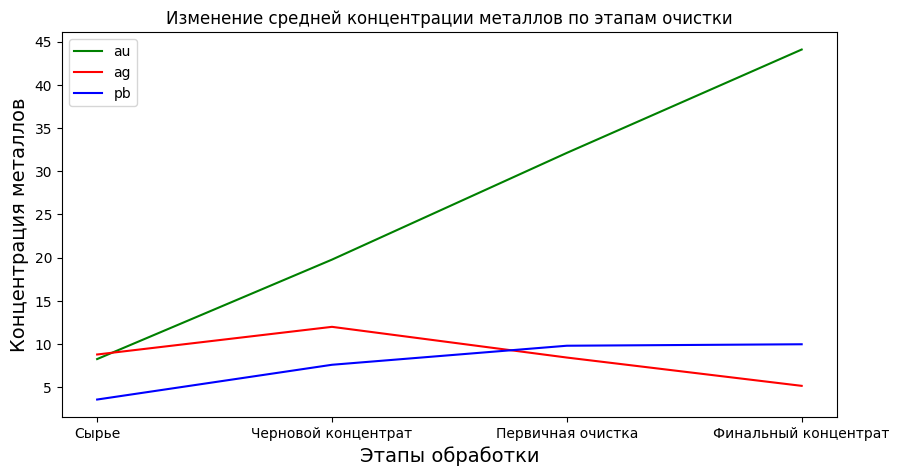

In [49]:
plt.figure(figsize=(10,5))
plt.plot(mean_au['этап'], mean_au['au'], color='green');
plt.plot(mean_ag['этап'], mean_ag['ag'], color='red');
plt.plot(mean_pb['этап'], mean_pb['pb'], color='blue');
plt.legend(['au','ag','pb'])
plt.title('Изменение средней концентрации металлов по этапам очистки')
plt.xlabel('Этапы обработки', size=14)
plt.ylabel('Концентрация металлов', size=14)
plt.show()

Вывод: по графикам видно что у свинца и золота концентрация растет от этапа к этапу, причем сильнее всего у золота  - линейный рост. А у серебра после черновой очистки концентрация падает.

Выявим строчки с аномальными концентрациями в full

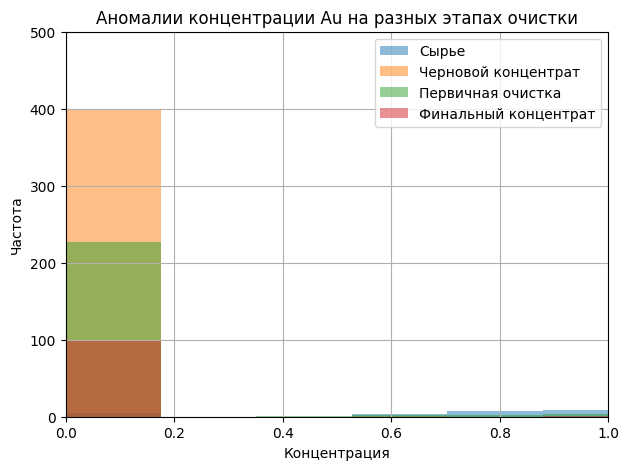

In [50]:
au.plot(kind='hist', bins=300, 
        grid=True, legend=True, alpha=0.5,
        figsize=(7, 5)).set_title('Аномалии концентрации Au на разных этапах очистки'); 
plt.xlabel('Концентрация')
plt.ylabel('Частота')
plt.xlim(0, 1)
plt.ylim(0, 500)
plt.show()

In [51]:
anomaly = concentrate[concentrate.isin([0]).any(axis=1)]
anomaly

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_size,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,primary_cleaner.input.feed_size,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol
date,,,,,,,,,,,,,,,,,,
2016-01-15 14:00:00,6.801254,6.046063,2.777324,40.381002,62.823127,18.511902,10.788951,7.537074,26.092838,7.25,0.000000,0.000000,0.000000,0.000000,42.509402,5.658943,10.436002,5.942418
2016-01-15 17:00:00,6.610732,5.599324,2.525838,41.302359,64.816398,18.089134,10.958096,7.267608,25.911055,7.25,0.000000,0.000000,0.000000,0.000000,41.406172,6.118749,10.483007,6.546983
2016-01-16 01:00:00,6.524249,5.689557,2.508414,43.042457,64.616077,17.583602,11.574823,7.384216,25.740506,7.25,0.000000,0.000000,0.000000,0.000000,44.059908,5.322681,9.577672,4.805490
2016-01-16 12:00:00,7.114065,7.521974,2.811569,41.154430,65.620714,0.000000,0.000000,0.000000,0.000000,7.25,37.633572,8.513177,9.724797,19.120964,46.614456,4.566664,10.406178,4.588698
2016-01-16 13:00:00,7.651522,7.313187,2.973841,41.983063,66.014780,0.000000,0.000000,0.000000,0.000000,7.25,37.718947,8.466262,9.780929,19.220963,46.250638,4.577832,10.691605,5.274175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-20 18:59:59,7.951063,8.576019,2.607144,38.972270,83.488615,0.000000,0.000000,0.000000,0.000000,8.55,34.881720,8.978113,10.463460,13.961403,47.660737,4.909904,9.941006,8.191698
2017-08-20 19:59:59,8.715784,8.640039,2.905023,39.239893,83.286682,0.000000,0.000000,0.000000,0.000000,8.55,34.803462,8.951252,10.754766,14.030272,47.801056,4.797572,9.889303,8.326773
2017-08-20 20:59:59,9.026122,8.769059,3.020251,39.314207,82.826034,0.000000,0.000000,0.000000,0.000000,8.55,36.013125,8.377929,11.010672,13.964058,49.412576,4.329492,9.413122,8.173988


Получилось выявить 601 строку с нулевыми значениями концентрации на одном из этапов. Из графиков и таблицы видно, что 0 могут быть на любой стадии обработки, т.е. на последней стадии могут быть нулевыми концентрации всех металлов, хотя на первых этапах были ненулевые значения. Это довольно странно, похоже на ошибки в данных, возможно это были пропуски значений. Удалим из тренировочной выборки все строки с индексами соответствующим аномалиям.

In [52]:
anomaly.index

Index(['2016-01-15 14:00:00', '2016-01-15 17:00:00', '2016-01-16 01:00:00',
       '2016-01-16 12:00:00', '2016-01-16 13:00:00', '2016-01-16 14:00:00',
       '2016-01-16 15:00:00', '2016-01-16 16:00:00', '2016-01-16 17:00:00',
       '2016-01-16 18:00:00',
       ...
       '2017-08-19 20:59:59', '2017-08-19 21:59:59', '2017-08-20 15:59:59',
       '2017-08-20 16:59:59', '2017-08-20 17:59:59', '2017-08-20 18:59:59',
       '2017-08-20 19:59:59', '2017-08-20 20:59:59', '2017-08-20 21:59:59',
       '2017-08-20 22:59:59'],
      dtype='object', name='date', length=601)

In [53]:
train_index = set(gold_train.index) - set(anomaly.index)

In [54]:
gold_train = gold_train.loc[train_index,:]
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13978 entries, 2016-07-28 00:59:59 to 2016-03-28 19:00:00
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       13978 non-null  float64
 1   rougher.input.feed_ag                       13978 non-null  float64
 2   rougher.input.feed_pb                       13978 non-null  float64
 3   rougher.input.feed_sol                      13978 non-null  float64
 4   rougher.input.feed_rate                     13978 non-null  float64
 5   rougher.input.feed_size                     13978 non-null  float64
 6   rougher.input.floatbank10_sulfate           13978 non-null  float64
 7   rougher.input.floatbank10_xanthate          13978 non-null  float64
 8   rougher.state.floatbank10_a_air             13978 non-null  float64
 9   rougher.state.floatbank10_a_level           13978 non-nu

###  Сравние распределения размеров гранул исходного сырья на обучающей и тестовой выборках. 
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [55]:
train_feed_size = gold_train.loc[:, gold_train.columns.str.contains('feed_size')]
test_feed_size = gold_test.loc[:, gold_test.columns.str.contains('feed_size')]

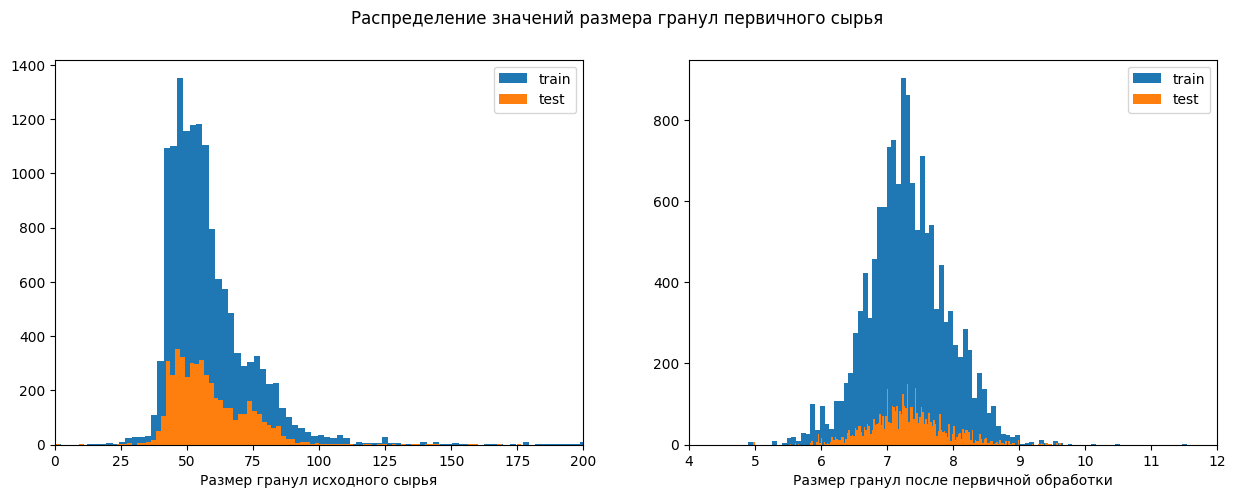

In [56]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5)) 

ax1.hist(train_feed_size['rougher.input.feed_size'], bins=200);
ax1.hist(test_feed_size['rougher.input.feed_size'], bins=200);
ax2.hist(train_feed_size['primary_cleaner.input.feed_size'], bins=200);
ax2.hist(test_feed_size['primary_cleaner.input.feed_size'], bins=200);

ax1.set_xlabel('Размер гранул исходного сырья')
ax2.set_xlabel('Размер гранул после первичной обработки')

fig.suptitle("Распределение значений размера гранул первичного сырья")
ax1.legend(["train", "test"])
ax2.legend(["train", "test"])
ax1.set_xlim(0,200)
ax2.set_xlim(4,12);

Вывод: по гистограммам видно, что распределения значений гранул в тренирововчной и тестовых выборках схожи. В случае исходного сырья распределение похоже на бинормальное, с двумя вершинами в районе значений 50 и 75. В случае гранул после первичной обработки распределения более симметричные, нормальные, со схожими характерными выбросами.

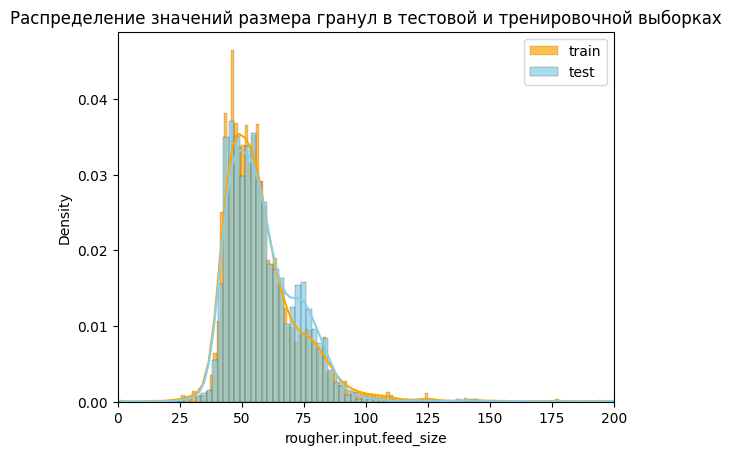

In [59]:
sns.histplot(data=gold_train['rougher.input.feed_size'], stat='density',
             color="orange", alpha = 0.7, kde = True, label='train')
sns.histplot(data=gold_test['rougher.input.feed_size'], stat='density',
             color="skyblue", alpha = 0.7, kde = True, label='test')
plt.legend()
plt.xlim(0,200)
plt.title('Распределение значений размера гранул в тестовой и тренировочной выборках')
plt.show()

###  Исследование суммарной концентрацию металлов на разных стадиях.


In [60]:
concentrate.columns

Index(['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_size', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_sol', 'primary_cleaner.input.feed_size',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol'],
      dtype='object')

In [61]:
concentrate['summ_feed'] = concentrate['rougher.input.feed_au'] + \
    concentrate['rougher.input.feed_ag'] + concentrate['rougher.input.feed_pb']
            
concentrate['summ_rougher'] = concentrate['rougher.output.concentrate_au'] + \
       concentrate['rougher.output.concentrate_ag'] + concentrate['rougher.output.concentrate_pb']
        
concentrate['summ_primary'] = concentrate['primary_cleaner.output.concentrate_ag'] + \
    concentrate['primary_cleaner.output.concentrate_ag'] + concentrate['primary_cleaner.output.concentrate_ag']
        
concentrate['summ_final'] = concentrate['final.output.concentrate_au'] + \
       concentrate['final.output.concentrate_ag'] + concentrate['final.output.concentrate_pb']        

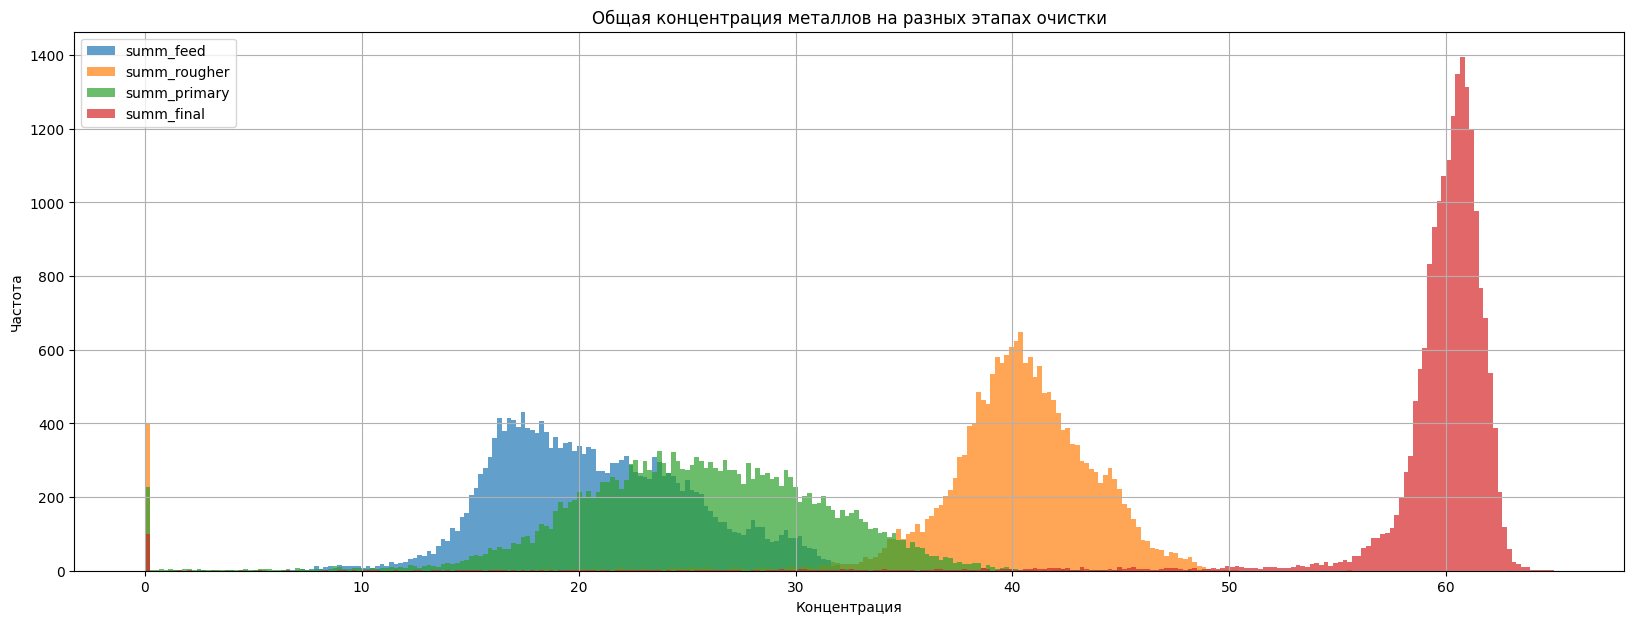

In [64]:
concentrate[['summ_feed', 'summ_rougher', 'summ_primary', 'summ_final']].plot(kind='hist', bins=300,
        grid=True, legend=True, alpha=0.7,
        figsize=(20, 7)).set_title('Общая концентрация металлов на разных этапах очистки');
plt.xlabel('Концентрация')
plt.ylabel('Частота')
plt.show()

*Выводы: Распределение значений суммарной концентрации металлов на разных стадиях обработки имеют характерные различия, характер распределения первичного сыря больше похож  на логнормальный, в других случаях  - симметричный нормальный характер, с уменьшением стандарнтного отклонения по мере обработки:разброс значений становится меньше, а концентрация выше (смещение распределений вдоль оси). Есть некоторое количество нулевых значений во всех случаях, самое высокое количество у гранул после грубой очистки.*

## Модель

### Функции расчета метрик sMAPE и Final sMAPE
 
Напишем функцию расчета метрики sMAPE и 
Final sMAPE (25%×sMAPE(rougher)+75%×sMAPE(final))

In [65]:
def smape(true, predict):
    up = abs(true - predict)
    down = (abs(true) + abs(predict))/2
    smape = ((up/down)*100).mean()
    return smape

def f_smape(true, predict):
    
    true_rougher = true['rougher.output.recovery']
    true_final = true['final.output.recovery']
    
    predict_rougher = predict[:, 0] #rougher.output.recovery
    predict_final = predict[:, 1] #final.output.recovery
    
    f_smape = 0.25*smape(true_rougher,predict_rougher) + 0.75*smape(true_final,predict_final)
    return f_smape

### Обучение моделей регрессии 


Для обучения моделей и предсказания параметров rougher.output.recovery и final.output.recovery разделим train и test на признаки для обучения и целевые признаки.

In [66]:
features_train = gold_train.drop(['rougher.output.recovery', 
                                'final.output.recovery'], axis=1)
target_train = gold_train[['rougher.output.recovery', 
                                'final.output.recovery']]
features_test = gold_test_merged.drop(['rougher.output.recovery', 
                                'final.output.recovery'], axis=1)
target_test = gold_test_merged[['rougher.output.recovery', 
                                'final.output.recovery']]
#target_train

Промасштабируем обучающие признаки

In [67]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train_sc = scaler.transform(features_train)
features_test_sc= scaler.transform(features_test)

Для выбора модели и подбора их параметров используем инструмент GridSearchCV, который использует кросс-валидацию для оптимизации гиперпараметров.  Функция оценки может быть указана с помощью параметра scoring. Нам необходимо, чтобы модель оптимизировалась по метрике final_smape.

In [68]:
smape_scorer = make_scorer(f_smape, greater_is_better=False)

Обучим модель DecisionTreeRegressor

In [69]:
param_grid = {'max_depth': range (2,5,1),
              'min_samples_leaf': range (1,8,1)}

In [70]:
model_dtr = DecisionTreeRegressor(random_state=125)
search = GridSearchCV(model_dtr, param_grid, cv=5, scoring = smape_scorer)
search.fit(features_train_sc, target_train)
print('Лучшие гиперпараметры:', search.best_params_)
print('Значение final_sMAPE:', -(search.best_score_))

Лучшие гиперпараметры: {'max_depth': 4, 'min_samples_leaf': 7}
Значение final_sMAPE: 7.16716627535084


Лучшие параметры модели DecisionTreeRegressor: min_samples_leaf': 7 при максимальной глубине деревьев 4.

Далее обучим модель RandomForestRegressor

In [71]:
param_grid = {'max_depth': range (2,5,1),
              'n_estimators': range(10, 51, 10)}

model_rfr = RandomForestRegressor(random_state=125)
search = GridSearchCV(model_rfr, param_grid, cv=5, scoring = smape_scorer)
search.fit(features_train_sc, target_train)
print('Лучшие гиперпараметры:', search.best_params_)
print('Значение final_sMAPE:', -(search.best_score_))

Лучшие гиперпараметры: {'max_depth': 4, 'n_estimators': 50}
Значение final_sMAPE: 7.00270799694696


Лучшие параметры модели RandomForestRegressor: 'n_estimators': 30 при максимальной глубине деревьев 4. 

Проверим еще модель Линейной Регрессии.

In [72]:
model_lr = LinearRegression()
model_lr.fit(features_train_sc, target_train)
lr_smape = cross_val_score(model_lr, features_train_sc, target_train, cv=5, scoring=smape_scorer)

print('Значение final_sMAPE:', -(lr_smape.mean()))

Значение final_sMAPE: 7.080740588461266


Проверим лучшую модель RandomForestRegressor на тестовой выборке.

In [73]:
model_rfr = RandomForestRegressor(random_state=125, n_estimators=10, max_depth=4)
model_rfr.fit(features_train_sc, target_train)
predict_rfr = model_rfr.predict(features_test_sc)
test_smape = f_smape(target_test, predict_rfr)
print('Final sMAPE модели на тестовой выборке:', (test_smape.mean()))

Final sMAPE модели на тестовой выборке: 6.990684204493167


In [74]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train_sc, target_train)
dummy_predict = dummy_regr.predict(features_test_sc)
dummy_smape = f_smape(target_test, dummy_predict)
print('Final sMAPE cлучайной модели:', (dummy_smape.mean()))

Final sMAPE cлучайной модели: 8.471360971505119


## Выводы
1. Предобработка данных.

Выявлено значительное количество пропусков: 3050 (21%) в тернировочной, 375 (7%) в тестовой и 4481 (23%) в полном наборе данных. Пропуски были заполнены методом ffill.

Расчитана эффективность обогащения.Вычислена средняя абсолютная ошибка между расчитанными значениями эффективности обагощения recovery и результатами в тренировочной выборке очень мала. Это говорит о надежности данных в тренировочной выборке. Сверены колонки в тренировочной и тестовой выборках. Отсутствующие колонки в основном содержат выходные параметры продукта (output), например концентрация металлов. Эти данные были удалены из тренирововчной выборки, тк являются онлайн-метриками. А целевые параметры были скопированы из полного набора данных full.

2. Анализ данных.

Проанализировано изменение концентрации металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. По графикам видно что у свинца и золота концентрация растет от этапа к этапу, причем сильнее всего у золота - линейный рост. А у серебра после черновой очистки концентрация падает.

Были выявлены аномальные значения концентраций металлов после стадий очистки руды, скорее всего это были пропуски в данных. Строки соответствующие этим аномалиям были удалены из тренирововчной выборки.

Проведено сравние распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Распределения практически идентичны. Исследованы суммарные концентрацию металлов на разных стадиях. Выявлены некоторые характерные различия: характер распределения первичного сыря больше похож на логнормальный, в других случаях - симметричный нормальный характер распределений, с уменьшением стандарнтного отклонения по мере обработки:разброс значений становится меньше, а концентрация выше. Есть некоторое количество нулевых значений во всех случаях, самое высокое количество - у гранул после грубой очистки.

3. Выбор модели.

Написана функция для расчета итоговой ошибки sMAPE. 
Обучено 3 модели прогнозирования параметров rougher.output.recovery и final.output.recovery. Лучший результат получился у модели RandomForestRegressor, final smape на тренировочной выборке 7.002, при тестировании лучшей модели на тестовой выборке результат получился чуть лучше 6.99. Худший результат у DecisionTreeRegressor. Также была проведена проверка на модели, предсказывающей средний результат - ошибка такой модели более 8.
